## import vari

In [ ]:
# import needed python libraries

import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from matplotlib.ticker import StrMethodFormatter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod


## Acquisition

In [2]:
#### List of Attributes for dataset acquired from german.doc
#### good/bad is the label 1 means good customer while 2 means bad
attributes = ["Status_account", "Duration", "Credit_history","Purpose",
             "Credit_amount","Savings_account_bonds","Employment_since","Install_rate",
              "Personal_status_sex","debtors_guarantors","Present_residence_since",
              "Property","Age","Other_install_plans","Housing","No_credits","Job",
              "No_people_liable","Telephone","foreign_worker","good_bad"] 

#### Acquiring dataset from german.data file
df = pd.read_csv("german.data", sep=' ', names = attributes)
df


,Status_account,Duration,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Employment_since,Install_rate,Personal_status_sex,debtors_guarantors,...,Property,Age,Other_install_plans,Housing,No_credits,Job,No_people_liable,Telephone,foreign_worker,good_bad
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Preprocessing

In [11]:
#### Qualitative attributes that do not require encoding 
to_remove = ["Duration","Credit_amount","Install_rate","Present_residence_since",
             "Age","No_credits","No_people_liable","good_bad"] 

#### Creating the list with the categorical attributes to be encoded
to_be_encoded = [col for col in df.columns if col not in to_remove]

#### Normalizing only the numerical values before one hot encoding for later uses 
scaler2 = MinMaxScaler()
df_normalized_with_categorical = df.copy()
df_normalized_with_categorical[to_remove] = scaler2.fit_transform(df_normalized_with_categorical[to_remove])
#display(df_normalized_with_categorical)

#### Using One Hot Encoding to transform categorical attributes into qualitative ones
df_encoded = pd.get_dummies(df, columns=to_be_encoded, dtype = int)
#display(df_encoded)

#### Setting bad to 0 and good to 1
df_encoded["good_bad"] = df_encoded["good_bad"].replace({2: 0, 1: 1})
#mask_bad = df_encoded['good_bad'] == 2
#df_encoded["good_bad"] = np.where(mask_bad, 0, 1)

#### Normalization between [0,1] and split into 80% training and 20% test 
scaler = MinMaxScaler()

#### Creation of the pandas dataframe of the normalized values
array_df_encoded2 = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(array_df_encoded2, columns=df_encoded.columns)

df_normalized
df_normalized_no_label = df_normalized.copy().drop('good_bad', axis=1)

display(df_normalized)
#display(df_normalized_no_label)

,Duration,Credit_amount,Install_rate,Present_residence_since,Age,No_credits,No_people_liable,good_bad,Status_account_A11,Status_account_A12,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,foreign_worker_A201,foreign_worker_A202
0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.117647,0.081765,0.666667,1.000000,0.214286,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.382353,0.198470,1.000000,1.000000,0.375000,0.000000,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
997,0.117647,0.030483,1.000000,1.000000,0.339286,0.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,0.602941,0.087763,1.000000,1.000000,0.071429,0.000000,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## First Split

In [13]:
#### Splitting the data into sets 
columns_no_label = df_normalized_no_label.columns
X, X_test, y, y_test = train_test_split(
    df_normalized_no_label[columns_no_label], # X
    df_normalized['good_bad'], # y
    stratify = df_normalized['good_bad'], # stratify the dataset based on class labels
    train_size = 0.8, # percentage of training set
)

## PCA

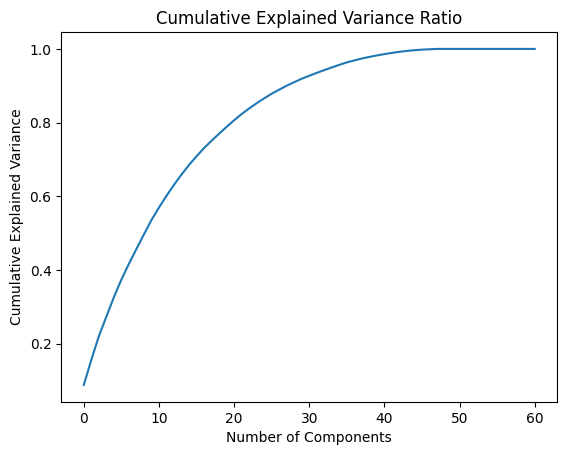

In [23]:
# Fit PCA to your data
pca = PCA().fit(X)  # X is your data matrix

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.show()

In [24]:
#### I choose 47 components because I'll be able to describe 100% of the dataset
X1=X.copy()
X1_test=X_test.copy()
pca = PCA(n_components = 47)
pca.fit(X1)

X_pca = pca.transform(X1)
X_pca_test = pca.transform(X1_test)

## Second split, one with PCA applied one without

In [25]:
#### further split into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    stratify = y, 
    train_size = 0.5/0.8, 
    random_state = 40
)

X_pca_train, X_pca_val, y_train, y_val = train_test_split(
    X_pca, y, 
    stratify = y, 
    train_size = 0.5/0.8, 
    random_state = 40
)

## GridSearch 

### without PCA

In [29]:
# Define the parameters for grid search
parameters = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
}

# Initialize Decision Tree Classifier
DT = DecisionTreeClassifier()

# Perform grid search with cross-validation
clf_DT = GridSearchCV(DT, parameters, cv=20, scoring='precision')
clf_DT.fit(X_train, y_train)

# Get the best parameters and score
best_criterion = clf_DT.best_estimator_.get_params()['criterion']
best_max_depth = clf_DT.best_estimator_.get_params()['max_depth']
best_min_samples_split = clf_DT.best_estimator_.get_params()['min_samples_split']
best_score = clf_DT.best_score_

# Print the results using f-strings
print(f"Best Criterion: {best_criterion}")
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_sample_split: {best_min_samples_split}")
print(f"Best Score: {best_score}")


Best Criterion: entropy
Best max_depth: 14
Best min_sample_split: 7
Best Score: 0.7714293446491588


### with PCA

In [30]:
def print_results(clf):
    """Prints the best parameters and score obtained from grid search."""
    best_params = clf.best_estimator_.get_params()
    print('Best Criterion:', best_params['criterion'])
    print('Best max_depth:', best_params['max_depth'])
    print('Best min_sample_split:', best_params['min_samples_split'])
    print('Best Score:', clf.best_score_)

parameters = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 4, 6, 8, 10, 12, 14],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
}

DT = DecisionTreeClassifier()
clf_DT_pca = GridSearchCV(DT, parameters, cv=20, scoring='precision')

try:
    clf_DT_pca.fit(X_pca_train, y_train)
    print_results(clf_DT_pca)
except Exception as e:
    print("An error occurred during grid search:", e)


Best Criterion: gini
Best max_depth: 14
Best min_sample_split: 8
Best Score: 0.7771973722012421


## Final Testing

### without PCA

              precision    recall  f1-score   support

         0.0       0.35      0.30      0.32        60
         1.0       0.72      0.76      0.74       140

    accuracy                           0.62       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.61      0.62      0.62       200



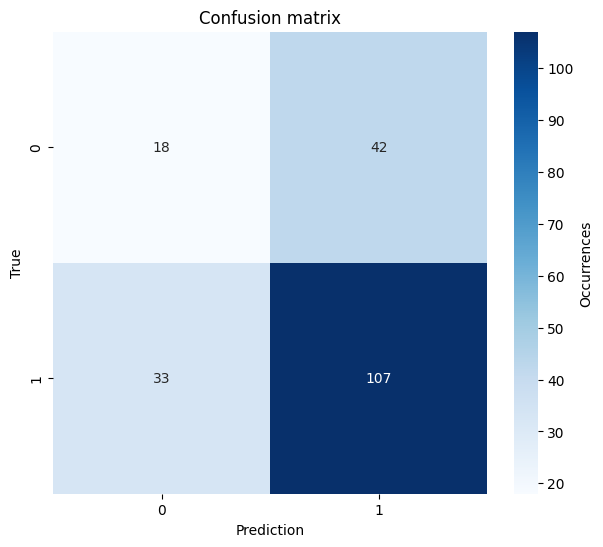

In [32]:
# Store best parameters
best_params = clf_DT.best_estimator_.get_params()
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Initialize Decision Tree Classifier with best parameters
DT_final = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=0
)
DT_final.fit(X_train, y_train)
y_pred = DT_final.predict(X_test)

# Function to print classification report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Function to generate confusion matrix
def generate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to visualize confusion matrix
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(7, 6))
    sns.heatmap(confusion_matrix, cmap='Blues', annot=True, cbar_kws={'label': 'Occurrences'}, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

# Print classification report
print_classification_report(y_test, y_pred)

# Generate and visualize confusion matrix
confusion = generate_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion)


### with PCA

              precision    recall  f1-score   support

         0.0       0.38      0.50      0.43        60
         1.0       0.75      0.66      0.70       140

    accuracy                           0.61       200
   macro avg       0.57      0.58      0.57       200
weighted avg       0.64      0.61      0.62       200



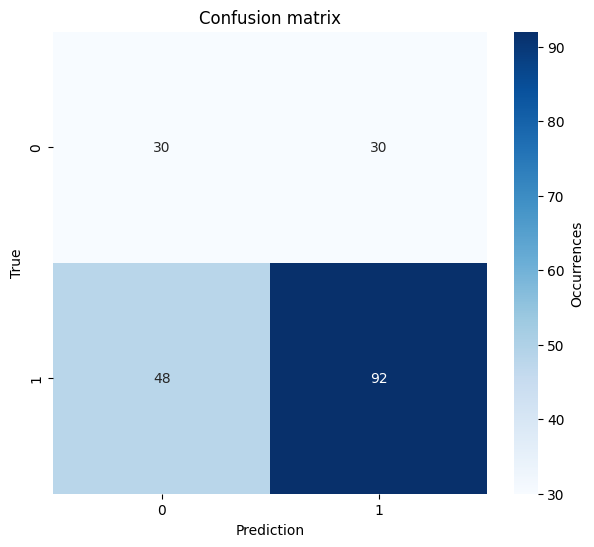

In [33]:
# Store best parameters
best_params = clf_DT_pca.best_estimator_.get_params()
best_criterion = best_params['criterion']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Initialize Decision Tree Classifier with best parameters
DT_final = DecisionTreeClassifier(
    criterion=best_criterion,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=0
)
DT_final.fit(X_pca_train, y_train)
y_pred = DT_final.predict(X_pca_test)

# Function to print classification report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Function to generate confusion matrix
def generate_confusion_matrix(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

# Function to visualize confusion matrix
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(7, 6))
    sns.heatmap(confusion_matrix, cmap='Blues', annot=True, cbar_kws={'label': 'Occurrences'}, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

# Print classification report
print_classification_report(y_test, y_pred)

# Generate and visualize confusion matrix
confusion = generate_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion)
